In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


In [2]:
new_recipe_data=pd.read_csv("Recipe Reviews and User Feedback Dataset.csv")
new_recipe_data.head()


,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [3]:
# Drop rows with missing values in the 'text' column
cleaned_data = new_recipe_data.dropna(subset=['text'])

cleaned_data['created_at'] = pd.to_datetime(cleaned_data['created_at'], unit='s')

cleaned_data.isnull().sum(), cleaned_data.dtypes


<ipython-input-3-72c5b447f557>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['created_at'] = pd.to_datetime(cleaned_data['created_at'], unit='s')


(Unnamed: 0         0
 recipe_number      0
 recipe_code        0
 recipe_name        0
 comment_id         0
 user_id            0
 user_name          0
 user_reputation    0
 created_at         0
 reply_count        0
 thumbs_up          0
 thumbs_down        0
 stars              0
 best_score         0
 text               0
 dtype: int64,
 Unnamed: 0                  int64
 recipe_number               int64
 recipe_code                 int64
 recipe_name                object
 comment_id                 object
 user_id                    object
 user_name                  object
 user_reputation             int64
 created_at         datetime64[ns]
 reply_count                 int64
 thumbs_up                   int64
 thumbs_down                 int64
 stars                       int64
 best_score                  int64
 text                       object
 dtype: object)

In [4]:

# Print the head of the dataset
print(cleaned_data.head())

   Unnamed: 0  recipe_number  recipe_code         recipe_name  \
0           0              1        14299  Creamy White Chili   
1           1              1        14299  Creamy White Chili   
2           2              1        14299  Creamy White Chili   
3           3              1        14299  Creamy White Chili   
4           4              1        14299  Creamy White Chili   

                                        comment_id         user_id  \
0  sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM  u_9iFLIhMa8QaG   
1  sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY  u_Lu6p25tmE77j   
2  sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP  u_s0LwgpZ8Jsqq   
3  sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC  u_fqrybAdYjgjG   
4  sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI  u_XXWKwVhKZD69   

    user_name  user_reputation          created_at  reply_count  thumbs_up  \
0     Jeri326                1 2022-10-13 00:11:29            0          0   
1     Mark467               50 2

In [5]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

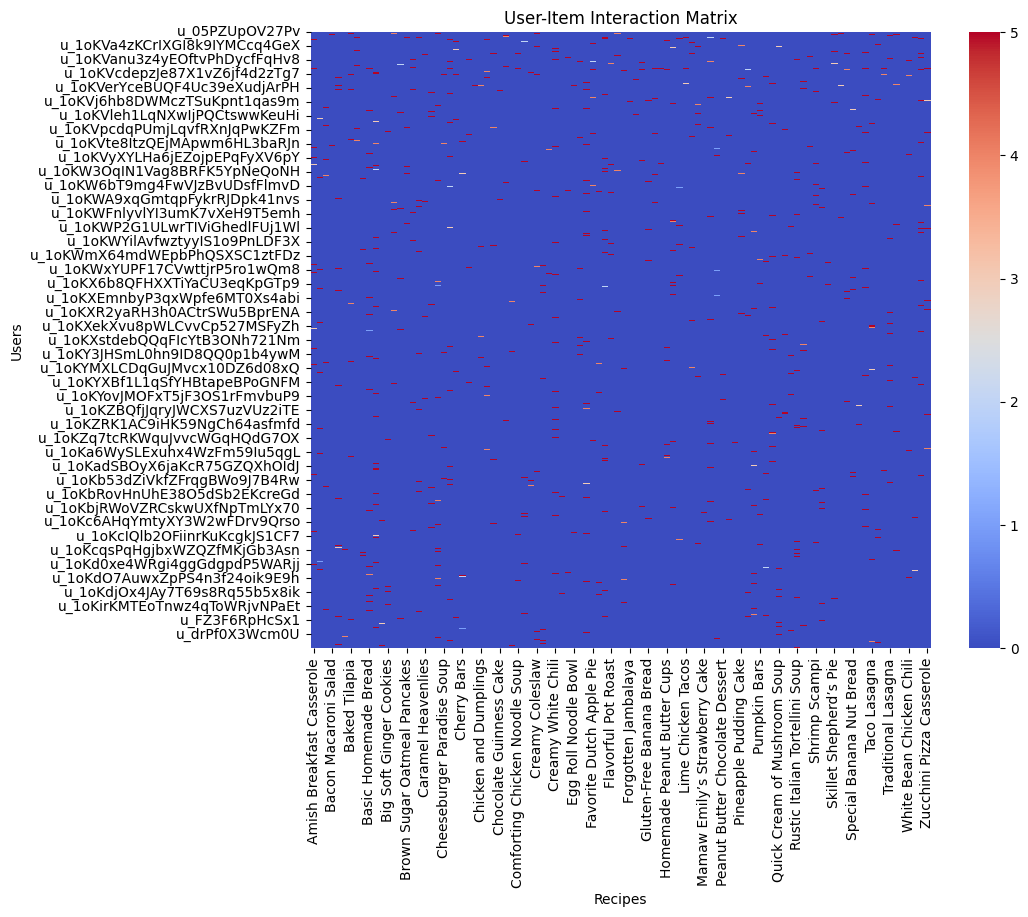

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

user_item_matrix = cleaned_data.pivot_table(index='user_id', columns='recipe_name', values='stars').fillna(0)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(user_item_matrix, cmap='coolwarm', cbar=True)
plt.title('User-Item Interaction Matrix')
plt.xlabel('Recipes')
plt.ylabel('Users')
plt.show()


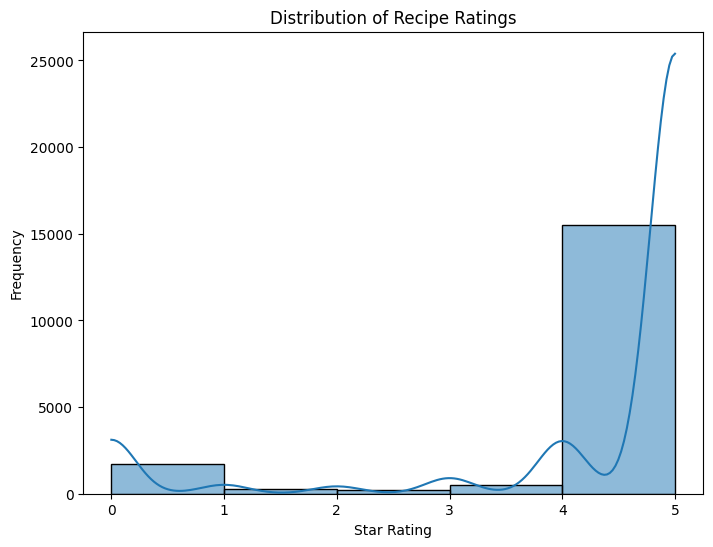

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of star ratings
fig, ax = plt.subplots(figsize=(8, 6))  # Corrected line
sns.histplot(cleaned_data['stars'], bins=5, kde=True, ax=ax) # add ax
plt.title('Distribution of Recipe Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.show()


In [8]:
from sklearn.model_selection import train_test_split

# Split the data: 80% training and 20% testing
train_data, test_data = train_test_split(cleaned_data, test_size=0.2, random_state=42)

# Verify the split
print("Training Set Size:", len(train_data))
print("Test Set Size:", len(test_data))


print("Unique users in training set:", train_data['user_id'].nunique())
print("Unique users in test set:", test_data['user_id'].nunique())
print("Unique recipes in training set:", train_data['recipe_name'].nunique())
print("Unique recipes in test set:", test_data['recipe_name'].nunique())


Training Set Size: 14544
Test Set Size: 3636
Unique users in training set: 11391
Unique users in test set: 3299
Unique recipes in training set: 100
Unique recipes in test set: 100


In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk

nltk.download('vader_lexicon')


sia = SentimentIntensityAnalyzer()


def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower()

train_data['cleaned_text'] = train_data['text'].apply(preprocess_text)
train_data['sentiment'] = train_data['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])


test_data['cleaned_text'] = test_data['text'].apply(preprocess_text)
test_data['sentiment'] = test_data['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])


tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix_train = tfidf.fit_transform(train_data['cleaned_text'])

tfidf_matrix_test = tfidf.transform(test_data['cleaned_text'])


print("Sentiment Analysis and TF-IDF Vectorization completed.")
print("TF-IDF Matrix for Training Set Shape:", tfidf_matrix_train.shape)
print("TF-IDF Matrix for Test Set Shape:", tfidf_matrix_test.shape)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment Analysis and TF-IDF Vectorization completed.
TF-IDF Matrix for Training Set Shape: (14544, 1000)
TF-IDF Matrix for Test Set Shape: (3636, 1000)


In [10]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors



pca = PCA(n_components=100)
reduced_features = pca.fit_transform(user_item_matrix)
reduced_features_df = pd.DataFrame(reduced_features, index=user_item_matrix.index)

# Create and initialize knn_model
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')

knn_model.fit(reduced_features_df)

NearestNeighbors(algorithm='brute', metric='cosine')

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Calculate cosine similarity on the TF-IDF matrix
content_similarity = cosine_similarity(tfidf_matrix_train)


def content_based_recommend(recipe_name, top_n=5):
    if recipe_name not in train_data['recipe_name'].values:
        return []
    idx = train_data[train_data['recipe_name'] == recipe_name].index[0]
    sim_scores = list(enumerate(content_similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:top_n + 1]
    recommended_indices = [i[0] for i in sim_scores]
    return train_data.iloc[recommended_indices]['recipe_name'].tolist()


In [12]:
from sklearn.neighbors import NearestNeighbors

# Collaborative filtering using Nearest Neighbors based on user ratings
user_item_matrix = train_data.pivot_table(index='user_id', columns='recipe_name', values='stars', aggfunc='mean').fillna(0)
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_item_matrix)

def collaborative_recommend(recipe_name, top_n=5):
    if recipe_name not in user_item_matrix.columns:
        return []
    recipe_vector = user_item_matrix[recipe_name].values.reshape(1, -1)
    distances, indices = knn_model.kneighbors(recipe_vector, n_neighbors=top_n + 1)
    recommended_indices = indices.flatten()[1:]
    return user_item_matrix.columns[recommended_indices].tolist()


In [13]:
def content_based_recommend(recipe_name, top_n=5):

    if recipe_name not in train_data['recipe_name'].values:
        print(f"Recipe '{recipe_name}' not found in training data.")
        return []

    # Get the index of the recipe in train_data
    idx = train_data[train_data['recipe_name'] == recipe_name].index[0]

    if idx >= len(content_similarity):
        print(f"Index {idx} out of bounds for content similarity matrix.")
        return []


    sim_scores = list(enumerate(content_similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)


    sim_scores = sim_scores[1:top_n + 1]
    recommended_indices = [i[0] for i in sim_scores]

    return train_data.iloc[recommended_indices]['recipe_name'].tolist()


In [14]:
def calculate_metrics(recommendations, true_values, k=5):
    # Calculate Precision@k
    precision = sum([1 for r in recommendations[:k] if r in true_values]) / k

    # Calculate Recall@k
    recall = sum([1 for r in recommendations[:k] if r in true_values]) / len(true_values)

    # Calculate Mean Reciprocal Rank (MRR)
    mrr = next((1 / (i + 1) for i, r in enumerate(recommendations[:k]) if r in true_values), 0)

    ap_sum = 0
    correct_count = 0
    for rank, recipe in enumerate(recommendations[:k]):
        if recipe in true_values:
            correct_count += 1
            ap_sum += correct_count / (rank + 1)

    ap = ap_sum / min(k, len(true_values))

    return precision, recall, mrr, ap


In [15]:
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split


cleaned_data['cleaned_text'] = cleaned_data['text'].apply(preprocess_text)


tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf.fit_transform(cleaned_data['cleaned_text'])

train_data, test_data, train_tfidf, test_tfidf = train_test_split(
    cleaned_data, tfidf_matrix, test_size=0.2, random_state=42
)


knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(train_tfidf)


def collaborative_recommend(recipe_name, top_n=5):
    if recipe_name not in train_data['recipe_name'].values:
        return []

    idx = train_data[train_data['recipe_name'] == recipe_name].index[0]

    if idx >= train_tfidf.shape[0]:
        return []

    distances, indices = knn.kneighbors(train_tfidf[idx], n_neighbors=top_n+1)
    recommendations = train_data.iloc[indices.flatten()[1:]]['recipe_name'].tolist()

    return recommendations
def content_based_recommend(recipe_name, top_n=5):
    if recipe_name not in train_data['recipe_name'].values:
        return []

    idx = train_data[train_data['recipe_name'] == recipe_name].index[0]


    if idx >= content_similarity.shape[0]:
        print(f"Index {idx} out of bounds for content similarity matrix.")
        return []

    sim_scores = list(enumerate(content_similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    recommendations = [train_data.iloc[i[0]]['recipe_name'] for i in sim_scores[1:top_n+1]]
    return recommendations



precision_content, recall_content, mrr_content, map_content = [], [], [], []
precision_collab, recall_collab, mrr_collab, map_collab = [], [], [], []

for _, row in test_data.iterrows():
    true_recipes = [row['recipe_name']]  # Ground truth recipes, wrapped in list

    # Content-based recommendations
    cb_recommendations = content_based_recommend(row['recipe_name'])
    if cb_recommendations:
        precision, recall, mrr, ap = calculate_metrics(cb_recommendations, true_recipes)
        precision_content.append(precision)
        recall_content.append(recall)
        mrr_content.append(mrr)
        map_content.append(ap)

    # Collaborative recommendations
    collab_recommendations = collaborative_recommend(row['recipe_name'])
    if collab_recommendations:
        precision, recall, mrr, ap = calculate_metrics(collab_recommendations, true_recipes)
        precision_collab.append(precision)
        recall_collab.append(recall)
        mrr_collab.append(mrr)
        map_collab.append(ap)


print("Content-Based Filtering Metrics:")
print(f"Precision@5: {np.mean(precision_content):.4f}")
print(f"Recall@5: {np.mean(recall_content):.4f}")
print(f"MRR: {np.mean(mrr_content):.4f}")
print(f"MAP: {np.mean(map_content):.4f}")

print("\nCollaborative Filtering Metrics:")
print(f"Precision@5: {np.mean(precision_collab):.4f}")
print(f"Recall@5: {np.mean(recall_collab):.4f}")
print(f"MRR: {np.mean(mrr_collab):.4f}")
print(f"MAP: {np.mean(map_collab):.4f}")


<ipython-input-15-7a30f309c3aa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['cleaned_text'] = cleaned_data['text'].apply(preprocess_text)


Index 17487 out of bounds for content similarity matrix.
Index 17227 out of bounds for content similarity matrix.
Index 16714 out of bounds for content similarity matrix.
Index 18139 out of bounds for content similarity matrix.
Index 17698 out of bounds for content similarity matrix.
Index 16072 out of bounds for content similarity matrix.
Index 14981 out of bounds for content similarity matrix.
Index 15734 out of bounds for content similarity matrix.
Index 17698 out of bounds for content similarity matrix.
Index 18139 out of bounds for content similarity matrix.
Index 17194 out of bounds for content similarity matrix.
Index 17937 out of bounds for content similarity matrix.
Index 16908 out of bounds for content similarity matrix.
Index 17937 out of bounds for content similarity matrix.
Index 16588 out of bounds for content similarity matrix.
Index 17194 out of bounds for content similarity matrix.
Index 17008 out of bounds for content similarity matrix.
Index 17487 out of bounds for c

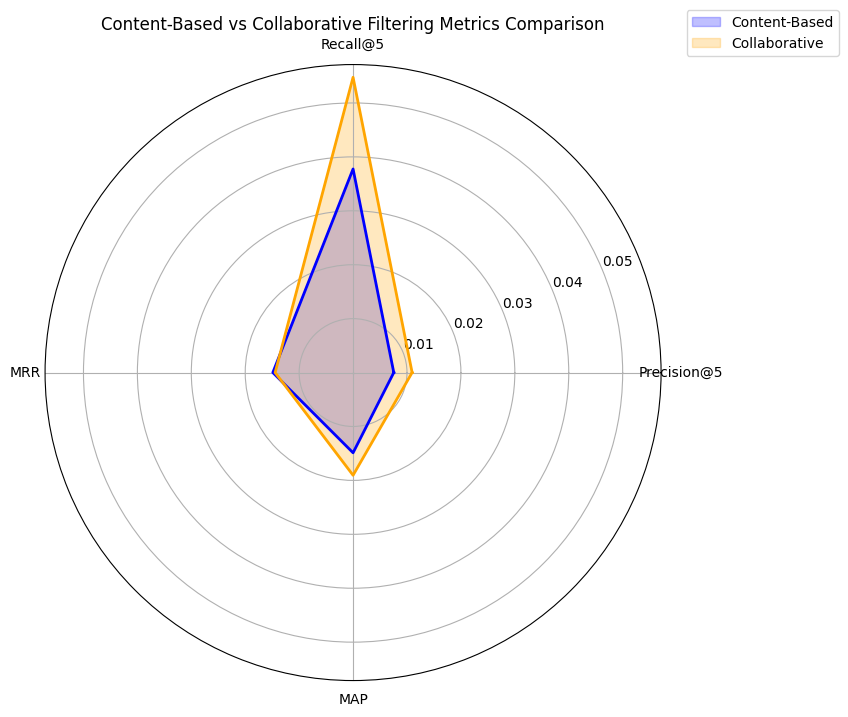

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate mean metrics for each approach
metrics_content = [
    np.mean(precision_content),
    np.mean(recall_content),
    np.mean(mrr_content),
    np.mean(map_content)
]

metrics_collab = [
    np.mean(precision_collab),
    np.mean(recall_collab),
    np.mean(mrr_collab),
    np.mean(map_collab)
]


metrics = ['Precision@5', 'Recall@5', 'MRR', 'MAP']


angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
metrics_content += metrics_content[:1]
metrics_collab += metrics_collab[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))


ax.fill(angles, metrics_content, color='blue', alpha=0.25, label='Content-Based')
ax.plot(angles, metrics_content, color='blue', linewidth=2)

ax.fill(angles, metrics_collab, color='orange', alpha=0.25, label='Collaborative')
ax.plot(angles, metrics_collab, color='orange', linewidth=2)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)


ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title("Content-Based vs Collaborative Filtering Metrics Comparison")

plt.show()


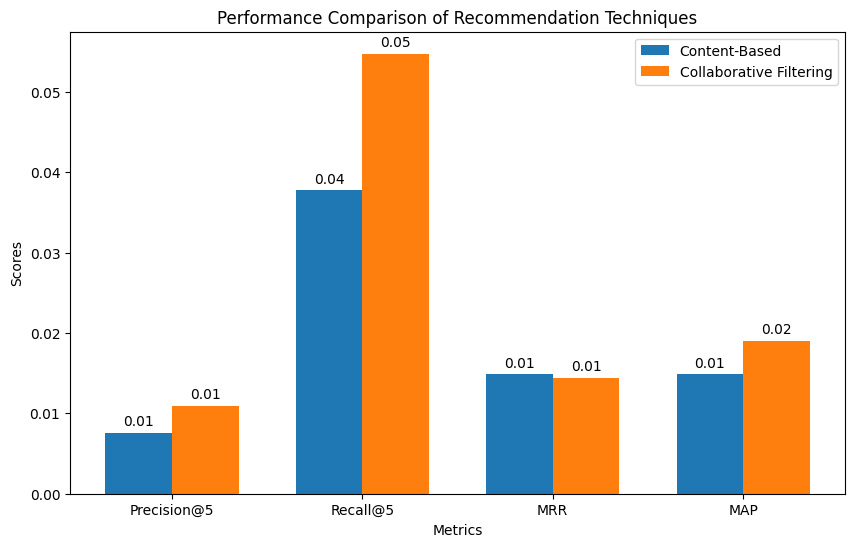

In [17]:
import matplotlib.pyplot as plt
import numpy as np


metrics_content = {
    'Precision@5': np.mean(precision_content),
    'Recall@5': np.mean(recall_content),
    'MRR': np.mean(mrr_content),
    'MAP': np.mean(map_content)
}

metrics_collab = {
    'Precision@5': np.mean(precision_collab),
    'Recall@5': np.mean(recall_collab),
    'MRR': np.mean(mrr_collab),
    'MAP': np.mean(map_collab)
}


metrics_labels = list(metrics_content.keys())
content_values = list(metrics_content.values())
collab_values = list(metrics_collab.values())

# Plotting the metrics
x = np.arange(len(metrics_labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, content_values, width, label='Content-Based')
rects2 = ax.bar(x + width/2, collab_values, width, label='Collaborative Filtering')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Recommendation Techniques')
ax.set_xticks(x)
ax.set_xticklabels(metrics_labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


In [34]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors

#  TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=500, stop_words='english')
tfidf_matrix = tfidf.fit_transform(cleaned_data['cleaned_text'])


svd = TruncatedSVD(n_components=100, random_state=42)
reduced_tfidf_matrix = svd.fit_transform(tfidf_matrix)


train_matrix = reduced_tfidf_matrix[:len(train_data)]

param_grid = [{'n_neighbors': 5, 'metric': 'cosine'}, {'n_neighbors': 10, 'metric': 'cosine'}]
results_train = []

def evaluate_knn(knn_model, data_matrix, data):
    precision_values, recall_values, mrr_values, map_values = [], [], [], []
    for idx in range(data.shape[0]):  # Use the index based on data's shape
        true_recipes = [data.iloc[idx]['recipe_name']]


        distances, indices = knn_model.kneighbors([data_matrix[idx]])
        recommendations = [data.iloc[i]['recipe_name'] for i in indices[0] if i < len(data)]


        precision, recall, mrr, ap = calculate_metrics(recommendations, true_recipes)
        precision_values.append(precision)
        recall_values.append(recall)
        mrr_values.append(mrr)
        map_values.append(ap)

    # Aggregate results
    return {
        'precision': np.mean(precision_values),
        'recall': np.mean(recall_values),
        'mrr': np.mean(mrr_values),
        'map': np.mean(map_values)
    }


for params in param_grid:
    knn_model = NearestNeighbors(n_neighbors=params['n_neighbors'], metric=params['metric'])
    knn_model.fit(train_matrix)


    train_results = evaluate_knn(knn_model, train_matrix, train_data)

    # Store results for each configuration
    results_train.append({'params': params, **train_results})


print("Hyperparameter Tuning Results on Training Data:")

for train in results_train:
    print(f"Hyperparameters: {train['params']}")
    print(f"  Precision@5: {train['precision']:.4f}")
    print(f"  Recall@5: {train['recall']:.4f}")
    print(f"  MRR: {train['mrr']:.4f}")
    print(f"  MAP: {train['map']:.4f}")
    print("-" * 40)


Hyperparameter Tuning Results on Training Data:
Hyperparameters: {'n_neighbors': 5, 'metric': 'cosine'}
  Precision@5: 0.2067
  Recall@5: 1.0333
  MRR: 0.9524
  MAP: 0.9893
----------------------------------------
Hyperparameters: {'n_neighbors': 10, 'metric': 'cosine'}
  Precision@5: 0.2066
  Recall@5: 1.0331
  MRR: 0.9523
  MAP: 0.9890
----------------------------------------


In [37]:

results_df = pd.DataFrame(results_train)


if 'params' in results_df.columns:
    results_df['n_neighbors'] = results_df['params'].apply(lambda x: x['n_neighbors'])
else:
    print("No 'params' column found in results_df.")

# Check the contents of the DataFrame
print(results_df.head())
g
results_df.set_index('n_neighbors', inplace=True)


heatmap_data = results_df[['precision', 'recall', 'mrr', 'map']].T


                                    params  precision    recall       mrr  \
0   {'n_neighbors': 5, 'metric': 'cosine'}   0.206656  1.033278  0.952398   
1  {'n_neighbors': 10, 'metric': 'cosine'}   0.206614  1.033072  0.952286   

        map  n_neighbors  
0  0.989316            5  
1  0.989045           10  


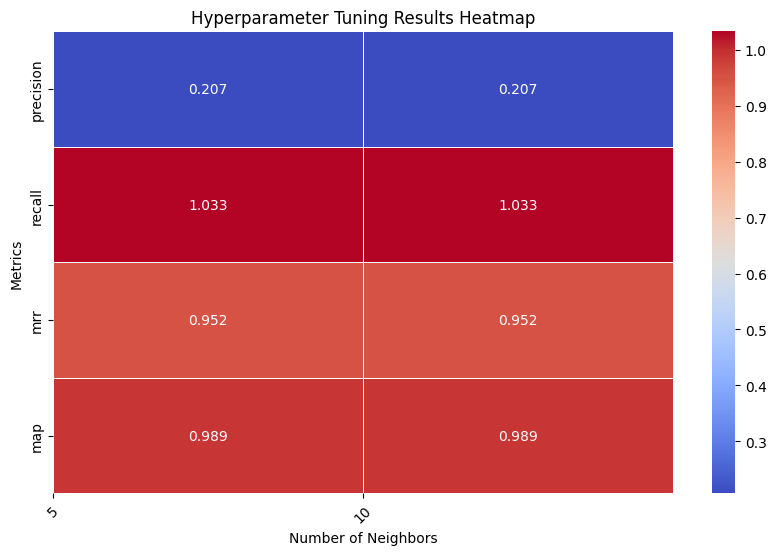

In [38]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".3f", cbar=True, linewidths=.5)
plt.title('Hyperparameter Tuning Results Heatmap')
plt.xlabel('Number of Neighbors')
plt.ylabel('Metrics')
plt.xticks(ticks=np.arange(len(results_df)), labels=results_df.index, rotation=45)
plt.show()


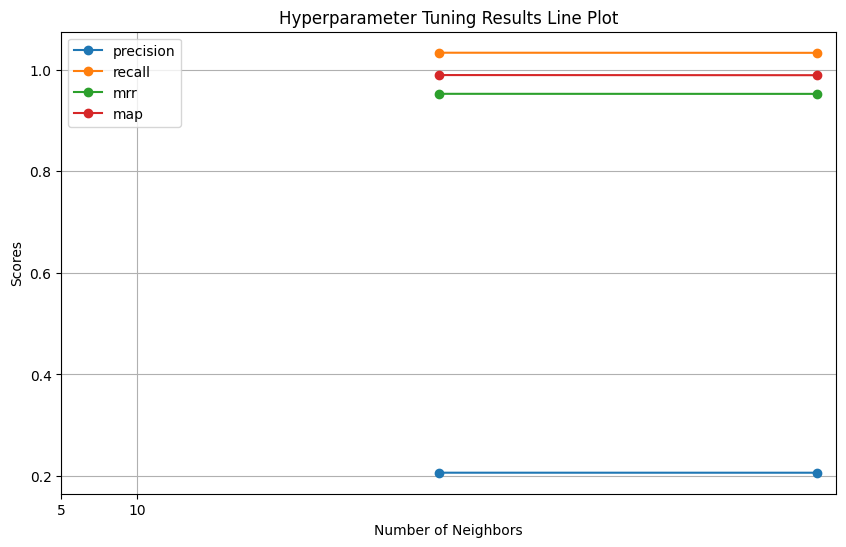

In [39]:

metrics = ['precision', 'recall', 'mrr', 'map']
plt.figure(figsize=(10, 6))

for metric in metrics:
    plt.plot(results_df.index, results_df[metric], marker='o', label=metric)

plt.title('Hyperparameter Tuning Results Line Plot')
plt.xlabel('Number of Neighbors')
plt.ylabel('Scores')
plt.xticks(ticks=np.arange(len(results_df)), labels=results_df.index)
plt.legend()
plt.grid()
plt.show()
